<a href="https://colab.research.google.com/github/drnikhiljon/deeplearning/blob/main/GAN_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the modules

# Welcome to the notebook 🙂

### Task 1 - Importing the Dataset

In [ ]:
import numpy as np
import pandas as pd

# Importing neural network modules
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
# Importing some machine learning modules
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Import data visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

print("Modules are imported!")

Modules are imported!


In [ ]:
data = pd.read_csv("Creditcard_dataset.csv")

Check the data shape

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
1,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
2,10,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0
3,10,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99,0
4,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0


Let's see how many genuine and limited fraudulent records we have

In [ ]:
data.shape

(50492, 31)

In [ ]:
data.Class.value_counts()

Class
0    50000
1      492
Name: count, dtype: int64

### Task 2 - Data Preprocessing and Exploration

*   Removing all the rows with `Nan` values
*   Removing `Time` column
*   Feature Scaling `Amount` column
*   Split the data into features and labels
*   Data Exploration


Removing the rows `Nan` values in the dataset

In [ ]:
data.dropna(inplace=True)
data.shape

(50492, 31)

Removing Time column

In [ ]:
data= data.drop(axis = 1, columns ='Time')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
1,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
2,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,1.626659,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0
3,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,0.309755,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99,0
4,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,0.460230,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0


Feature Scaling of Amount column

In [ ]:
#featurescaling of amount column

scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.150105,0
1,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,-0.199848,0
2,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,1.626659,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,-0.339490,0
3,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,0.309755,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.330223,0
4,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,0.460230,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,-0.256128,0


Let's split the genuine and fraud records into separate dataframes

In [ ]:
data_fraud = data[data.Class == 1]
data_genuine = data[data.Class == 0]

data_genuine

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.150105,0
1,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,-0.199848,0
2,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,1.626659,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,-0.339490,0
3,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,0.309755,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.330223,0
4,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,0.460230,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,-0.256128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-1.266580,-0.400461,0.956221,-0.723919,1.531993,-1.788600,0.314741,0.004704,0.013857,-0.815911,...,-0.157831,-0.883365,0.088485,-0.076790,-0.095833,0.132720,-0.028468,0.126494,-0.368731,0
49996,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,-0.111640,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,-0.270727,0
49997,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,-0.034011,0
49998,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.369238,0


Split the data into features and labels

In [ ]:
X = data.drop("Class", axis = 1)
y = data.Class

Data Exploration
  - Apply PCA to reduce the dimensionality of features `X` into two dimensions
  - Use a scatter plot to visualize our data

In [ ]:
pca = PCA(2)
transformed_data = pca.fit_transform(X)
df = pd.DataFrame(transformed_data)
df['label'] = y
df

,0,1,label
0,-0.447840,1.197514,0
1,-0.582392,0.258065,0
2,-0.939390,-0.728302,0
3,-0.630768,-0.499061,0
4,-0.536287,-1.055381,0
...,...,...,...
50487,10.855754,-2.787417,1
50488,6.927756,-4.949733,1
50489,7.038193,-2.785092,1
50490,11.649181,-1.991803,1


Let's Use a scatter plot to visualize our data

In [ ]:
px.scatter(df, x = 0, y = 1, color = df.label.astype(str))

### Task 3 - Building the Generator Model

Write a method to create the Generator model architecture

In [38]:
def build_generator():
    model = Sequential()

    model.add(Dense(32, activation = 'relu', input_dim = 29, kernel_initializer = 'he_uniform'))
    model.add(BatchNormalization())

    model.add(Dense(64,activation ='relu'))
    model.add(BatchNormalization())

    model.add(Dense(128,activation ='relu'))
    model.add(BatchNormalization())

    model.add(Dense(29,activation ='linear'))
    model.summary()

    return model



In [ ]:
build_generator()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                960       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_2 (Bat  (None, 128)               5

### Task 4 - Building the Discriminator Model

Write a method to create the Discriminator model architecture

In [ ]:
def build_discriminator():

    model = Sequential()
    model.add(Dense(128, input_dim = 29, activation = 'relu',kernel_initializer ='he_uniform'))

    model.add(Dense(64, activation ='relu'))
    model.add(Dense(32, activation ='relu'))
    model.add(Dense(32, activation ='relu'))
    model.add(Dense(16, activation ='relu'))

    model.add(Dense(1, activation ='sigmoid'))
    model.compile(optimizer ='adam', loss = 'binary_crossentropy')
    model.summary()
    return model

build_discriminator()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               3840      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 15777 (61.63 KB)
Trainable params: 15777

### Task 5 - Combine Generator and Discriminator models to Build The GAN

In [ ]:
def build_gan(generator, discriminator):
  discriminator.trainable = False
  gan_input = Input(shape = (generator.input_shape[1],))
  x = generator(gan_input)

  gan_output = discriminator(x)
  gan = Model(gan_input,gan_output)
  gan.summary()
  return gan


Let's create a method that generates synthetic data using the Generator

In [ ]:
def generate_synthetic_data(generator, num_samples):
  noise = np.random.normal(0, 1, (num_samples, generator.input_shape[1]))
  fake_data = generator.predict(noise)
  return fake_data

### Task 6 - Train and evaluate our GAN
*    Defining some variables
*    Creating our GAN
*    Training the GAN
*    Monitor the GAN performance using PCA




In [39]:
def monitor_generator(generator):
    # Initialize a PCA (Principal Component Analysis) object with 2 components
    pca = PCA(n_components=2)

    # Drop the 'Class' column from the fraud dataset to get real data
    real_fraud_data = data_fraud.drop("Class", axis=1)

    # Transform the real fraud data using PCA
    transformed_data_real = pca.fit_transform(real_fraud_data.values)

    # Create a DataFrame for the transformed real data and add a 'label' column with the value 'real'
    df_real = pd.DataFrame(transformed_data_real)
    df_real['label'] = "real"

    # Generate synthetic fraud data using the provided generator and specify the number of samples (492 in this case)
    synthetic_fraud_data = generate_synthetic_data(generator, 492)

    # Transform the synthetic fraud data using PCA
    transformed_data_fake = pca.fit_transform(synthetic_fraud_data)

    # Create a DataFrame for the transformed fake data and add a 'label' column with the value 'fake'
    df_fake = pd.DataFrame(transformed_data_fake)
    df_fake['label'] = "fake"

    # Concatenate the real and fake data DataFrames
    df_combined = pd.concat([df_real, df_fake])

    # Create a scatterplot to visualize the data points, using the first and second PCA components as x and y, respectively,
    # and color points based on the 'label' column, with a size of 10
    plt.figure()
    sns.scatterplot(data=df_combined, x=0, y=1, hue='label', s=10)
    plt.show()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 32)                960       
                                                                 
 batch_normalization_24 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dense_81 (Dense)            (None, 64)                2112      
                                                                 
 batch_normalization_25 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dense_82 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_26 (Ba  (None, 128)             

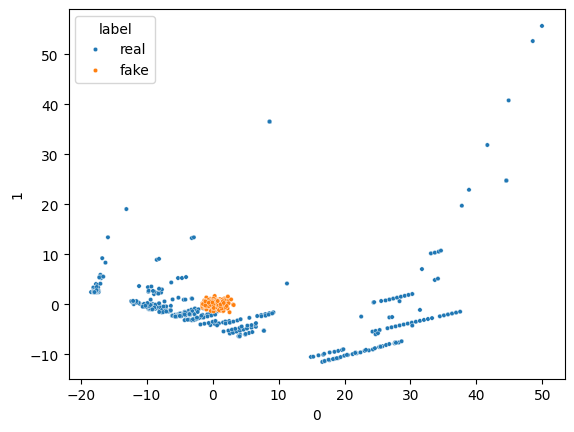

16/16 [==============================] - 0s 2ms/step


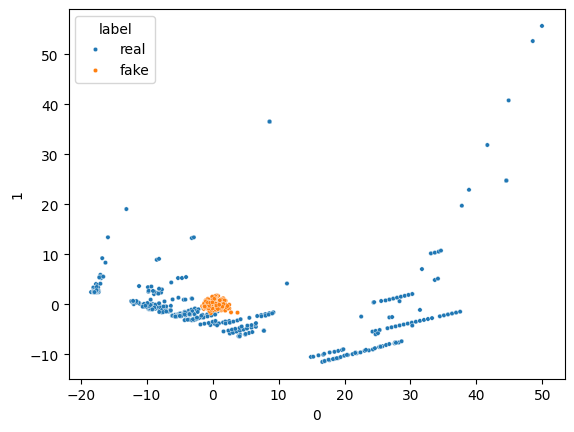

16/16 [==============================] - 0s 3ms/step


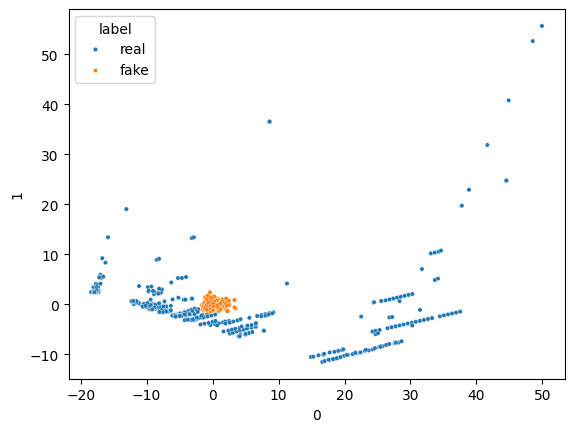

16/16 [==============================] - 0s 2ms/step


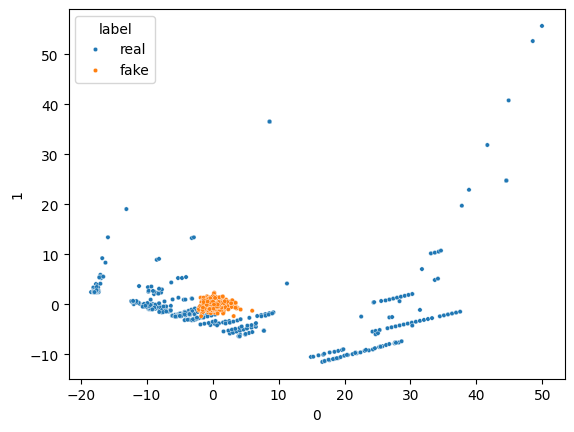

16/16 [==============================] - 0s 2ms/step


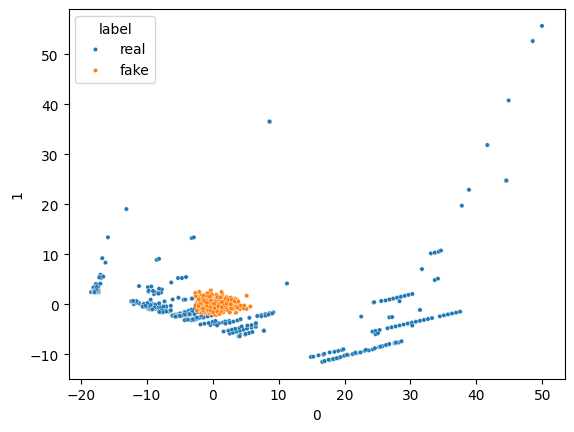

16/16 [==============================] - 0s 3ms/step


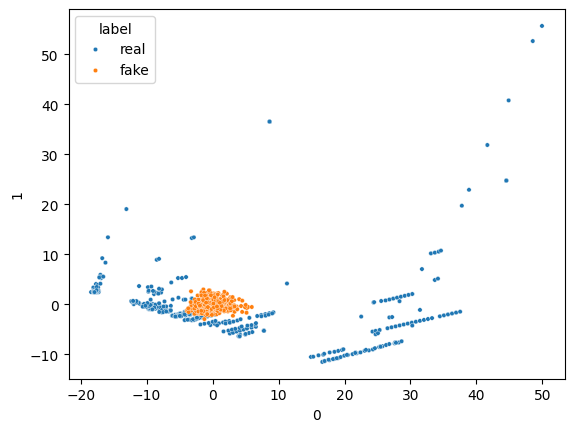

16/16 [==============================] - 0s 2ms/step


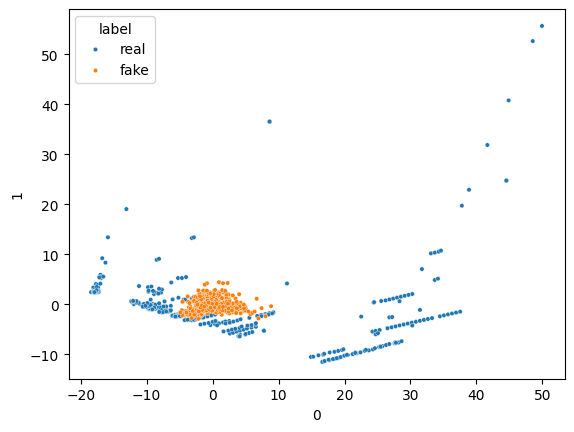

16/16 [==============================] - 0s 4ms/step


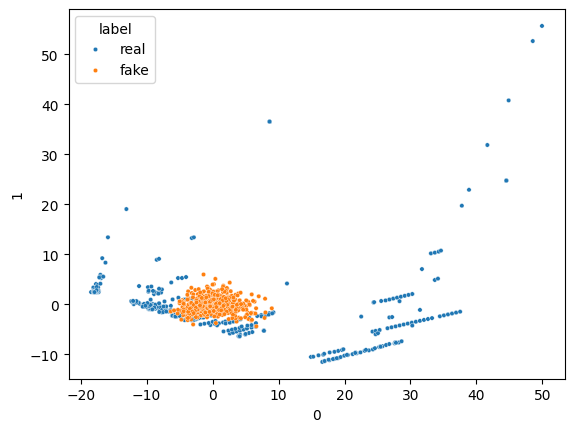

16/16 [==============================] - 0s 3ms/step


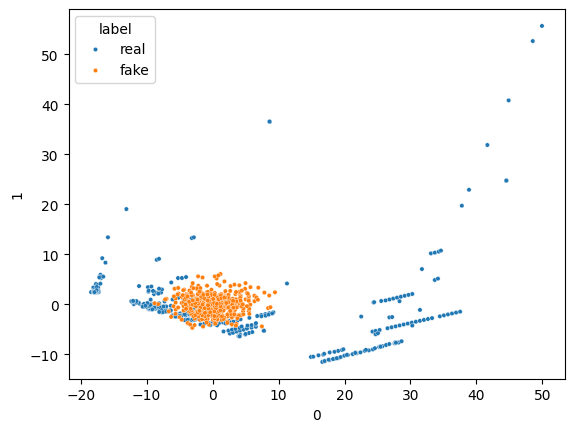

16/16 [==============================] - 0s 3ms/step


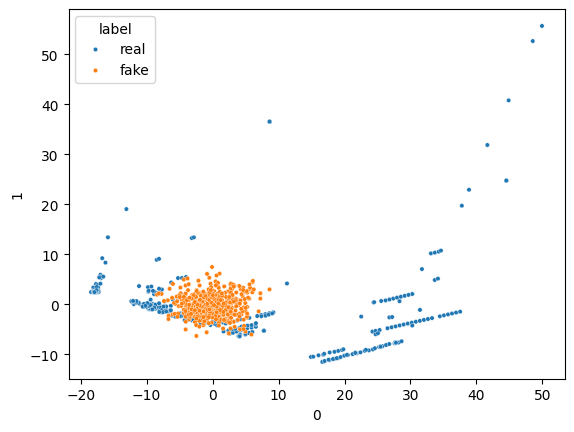

1/1 [==============================] - 0s 24ms/step


In [40]:
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator,discriminator)
gan.compile(optimizer = 'adam', loss = 'binary_crossentropy')

num_epochs = 100  #hyperparameters
batch_size = 32
half_batch = int(batch_size / 2)

for epoch in range(num_epochs):

  X_fake = generate_synthetic_data(generator, half_batch)
  Y_fake = np.zeros((half_batch, 1))

  X_real = data_fraud.drop("Class", axis = 1).sample(half_batch)
  Y_real = np.ones((half_batch, 1))

  discriminator.trainable = True
  discriminator.train_on_batch(X_real, Y_real)
  discriminator.train_on_batch(X_fake, Y_fake)

  noise = np.random.normal(0,1,(batch_size, 29))
  gan.train_on_batch(noise, np.ones((batch_size,1)))

  if epoch%10 == 0:
    monitor_generator(generator)





### Task 7 - Generate synthetic data using the trained Generator

*   Generate 1000 fradulent data points using the trained generator
*   Compare the distribution of `real` and `synthetic` fradulent data points.


In [32]:
synthetic_data = generate_synthetic_data(generator, 1000)
df = pd.DataFrame(synthetic_data)
df['label'] = 'fake'

df2 = data_fraud.drop("Class", axis = 1)
df2['label'] = 'real'
df2.columns = df.columns

combined_df = pd.concat([df, df2])
combined_df

32/32 [==============================] - 0s 3ms/step


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,label
0,0.060823,0.127170,0.000000,0.024268,0.168231,0.210130,0.000000,0.070888,0.000000,0.318589,...,0.000000,0.291039,0.243365,0.199099,0.320436,0.078118,0.000000,0.000000,0.000000,fake
1,0.000000,0.528242,0.000000,0.000000,0.121043,0.146978,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.150267,0.000000,0.000000,0.116880,0.000000,0.128004,0.000000,0.233565,fake
2,0.000000,0.434934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001922,0.006326,...,0.000000,0.065731,0.000000,0.000000,0.322730,0.099527,0.229297,0.000000,0.000000,fake
3,0.259734,0.512962,0.000000,0.000000,0.064724,0.178617,0.000000,0.000000,0.000000,0.587122,...,0.000000,0.705126,0.044793,0.026488,0.638272,0.216121,0.000000,0.000000,0.000000,fake
4,0.000000,0.396734,0.000000,0.000000,0.140024,0.000000,0.000000,0.180237,0.000000,0.139795,...,0.000000,0.250137,0.000000,0.155404,0.288391,0.094407,0.000000,0.000000,0.228851,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50487,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.277825,real
50488,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.369281,real
50489,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.042898,real
50490,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.664244,real


Checking the individual feature distribution of `synthetic` and `real` fraud data.

In [42]:
for col in combined_df.columns:
  plt.figure()
  fig = px.histogram(combined_df, color = 'label', x=col,barmode="overlay", title = f'Feature {col}', width = 640, height = 500)
  fig.show()

<ipython-input-42-7712b9dc83b8>:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>